In [11]:
import json
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
N_REP = 100

In [2]:
with open('sim_R0.txt') as fin:
    line = fin.readline()

In [27]:
line

'["fake_0", 1, {"00001": 95, "01101": 107, "00111": 96, "11011": 89, "00110": 115, "01100": 107, "10001": 87, "01010": 111, "10011": 101, "01111": 104, "00000": 84, "01011": 106, "00010": 89, "10101": 79, "10000": 111, "11100": 104, "11110": 88, "01110": 108, "10100": 87, "11101": 96, "00101": 112, "01001": 94, "00100": 108, "00011": 86, "01000": 104, "11111": 103, "10110": 86, "10010": 110, "11010": 114, "11001": 88, "10111": 115, "11000": 116}]\n'

In [3]:
json.loads(line)

['fake_0',
 1,
 {'11011': 104,
  '00111': 101,
  '11010': 101,
  '01000': 117,
  '01110': 107,
  '10110': 112,
  '11111': 110,
  '10010': 100,
  '00101': 79,
  '01001': 97,
  '00100': 101,
  '00011': 87,
  '10011': 106,
  '01100': 105,
  '10001': 100,
  '01010': 96,
  '01111': 107,
  '00110': 109,
  '11000': 104,
  '10111': 116,
  '00010': 93,
  '11100': 95,
  '11110': 97,
  '10101': 79,
  '10000': 100,
  '10100': 100,
  '11101': 94,
  '11001': 89,
  '00000': 93,
  '01011': 110,
  '01101': 99,
  '00001': 92}]

In [29]:
def get_values(data, nbits):
    values = [0]*2**nbits
    for key, v in data.items():
        pos = int(key, 2)
        values[pos] = v
    return values


def read_results(filename, nbits):
    with open(filename) as fin:
        results = {}
        for line in fin:
            data = json.loads(line)
            results[f'{data[0]}_{data[1]}'] = get_values(data[2], nbits)
    return results

def get_plot(values):
    
    values = np.array(values)
    ys = values/(len(values)*N_REP)
    fig, ax = plt.subplots(figsize=(6*(len(values)/32),4))
    values = np.array(values)
    ys = values/(len(values)*N_REP)
    mean = np.mean(ys)
    ind = range(len(ys))
    ax.bar(ind, ys)
    
    # ax.text(len(ys) ,mean, mean)
    ax.hlines(mean, 0, len(ys), linestyles='dotted', color='red')
    ind = list(filter(lambda x: x%2**2==0, ind))
    ax.set_xticks(ind)
    labels = map(lambda x: f'{x:05b}', ind)
    ax.set_xticklabels(labels)
    return fig

def show_res(values):
    v = np.array(values)/(len(values)*100)
    mean = np.mean(v)
    low = v[v<=mean]
    high = v[v>mean]
    print(f'#low: {len(low)}')
    print(f'#high: {len(high)}')
    print(f'mean: {mean}')
    print(f'mean low: {np.mean(low)}')
    print(f'mean high: {np.mean(high)}')
    print(f'max low: {max(low)}')
    print(f'min high: {min(high)}')
    print(f'min max ratio: {min(high)/max(low)}')


In [21]:
res0 = read_results('experiments/sim_R0.txt', 5)
res_2_1 = res0['mtR0_2_1']
res_2_3 = res0['mtR0_2_3']

<ipython-input-14-562aab2cde87>:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


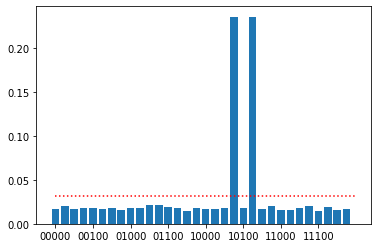

In [14]:
fig = get_plot(res_2_1)
fig.show()

<ipython-input-22-320486a94e45>:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


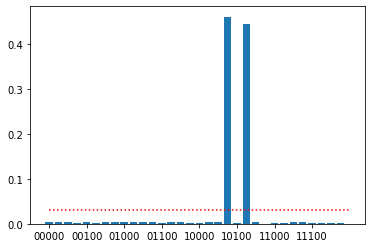

In [22]:
fig = get_plot(res_2_2)
fig.show()

In [17]:
show_res(res_2_1)

mean: 0.03125
mean low: 0.017645833333333336
mean high: 0.2353125
max low: 0.0215625
min high: 0.2353125
min max ratio: 10.913043478260871


In [23]:
show_res(res_2_3)

mean: 0.03125
mean low: 0.0013750000000000004
mean high: 0.479375
max low: 0.003125
min high: 0.465625
min max ratio: 149.0


In [20]:
np.pi/4*np.sqrt(2**4)

3.141592653589793

In [25]:
res1 = read_results('experiments/sim_R1.txt', 6)

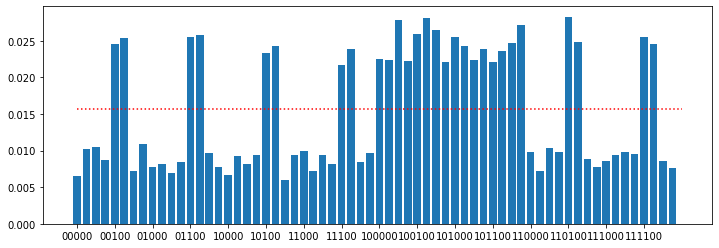

In [27]:
res1_1 = res1['mtR1_2_1']
fig = get_plot(res1_1)

In [30]:
show_res(res1_1)

#low: 36
#high: 28
mean: 0.015625
mean low: 0.008663194444444444
mean high: 0.024575892857142862
max low: 0.0109375
min high: 0.02171875
min max ratio: 1.9857142857142858


<ipython-input-32-cbf8fdd4370e>:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


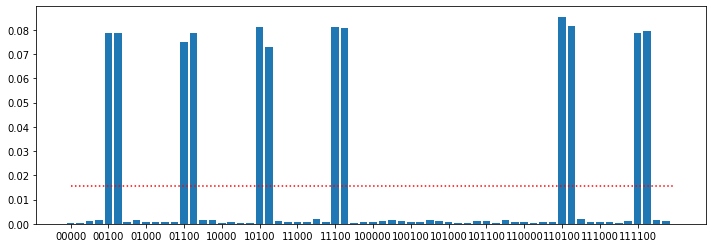

In [32]:
res1_2 = res1['mtR1_2_2']
fig = get_plot(res1_2)
fig.show()

In [34]:
show_res(res1_2)

#low: 52
#high: 12
mean: 0.015625
mean low: 0.0009104567307692307
mean high: 0.07938802083333334
max low: 0.001875
min high: 0.073125
min max ratio: 39.0


In [35]:
0.0009104567307692307 * 100

0.09104567307692307

In [36]:
np.pi/4 * np.sqrt(2**6/12)

1.8137993642342176

In [10]:
def get_plot(values):
    def most_decimal(mean):
        res = 1
        while mean<1:
            res = res/10
            mean = mean * 10
        return res
    
    values = np.array(values)
    ys = values/(len(values)*100)
    fig, ax = plt.subplots(figsize=(6*(len(values)/32),4))
    values = np.array(values)
    ys = values/(len(values)*100)
    mean = np.mean(ys)
    ind = range(len(ys))
    ax.bar(ind, ys)
    
    # ax.text(len(ys) ,mean, mean)
    ax.hlines(mean, 0, len(ys), linestyles='dotted', color='red')
    ind = list(filter(lambda x: x%2**2==0, ind))
    ax.set_xticks(ind)
    labels = map(lambda x: f'{x:05b}', ind)
    ax.set_xticklabels(labels)
    return fig


In [11]:
size = len(res['mtR1_0_1'])
ys = np.array(res['mtR1_0_1'])

In [12]:
np.mean(ys)

100.0

<ipython-input-13-09d3e78ef54c>:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


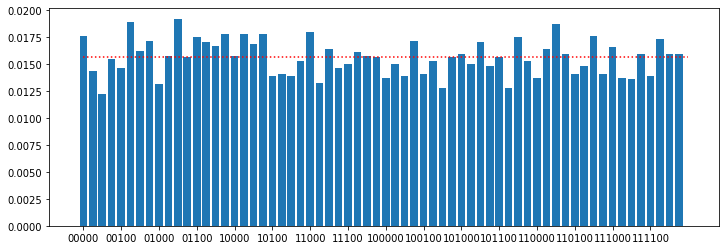

In [13]:
fig = get_plot(ys)
fig.show()

<ipython-input-40-0041823ee8f5>:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


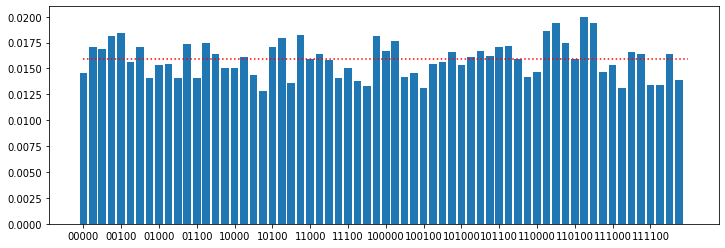

In [40]:
ys2 = stats.binom.rvs(size*100, 1.0/size, size=size)
fig = get_plot(ys2)
fig.show()

In [43]:
stats.kstest(ys2, 'binom', args=(size*100, 1.0/size), alternative='two-sided')

KstestResult(statistic=0.1360421023995818, pvalue=0.1705123135879162)

In [42]:
stats.kstest(ys, 'binom', args=(size*100, 1.0/size), alternative='two-sided')

KstestResult(statistic=0.09621073074229977, pvalue=0.5612896990245108)

In [94]:
stats.kstest(res['mtR0_0_1'], 'binom', args=(size*100, 1/size), alternative='two-sided')

KstestResult(statistic=0.11284188195563782, pvalue=0.7683680956191852)

TypeError: set_ticks() got an unexpected keyword argument 'labels'

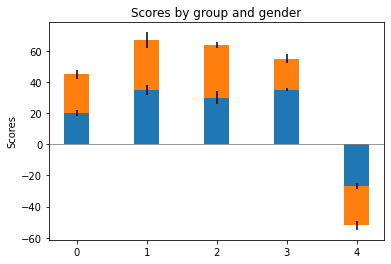

In [5]:
N = 5
menMeans = (20, 35, 30, 35, -27)
womenMeans = (25, 32, 34, 20, -25)
menStd = (2, 3, 4, 1, 2)
womenStd = (3, 5, 2, 3, 3)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence


fig, ax = plt.subplots()

p1 = ax.bar(ind, menMeans, width, yerr=menStd, label='Men')
p2 = ax.bar(ind, womenMeans, width,
            bottom=menMeans, yerr=womenStd, label='Women')

ax.axhline(0, color='grey', linewidth=0.8)
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(ind, labels=['G1', 'G2', 'G3', 'G4', 'G5'])
ax.legend()

# Label with label_type 'center' instead of the default 'edge'
ax.bar_label(p1, label_type='center')
ax.bar_label(p2, label_type='center')
ax.bar_label(p2)

plt.show()
